# Identifyng Current Trends in Geologic Resarch via Topic Modeling
### Corey Solitiare
12.7.2020

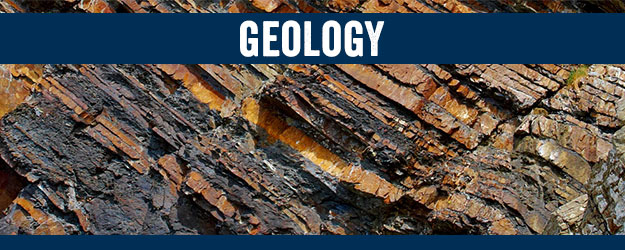

<div class="alert alert-block alert-info"><b></b></div>


# Executive Summary:
***
### Project Summary:

The purpose of this project was to utilize web scraping to identify current trends in Geologic research by preforming topic modeling on GitHub repository README texts. A function was developed that takes in a list of GitHub URL addresses and collects README text data, as well as the repository's primary programing language. After texts were collected the LatentDirichletAllocation class from the sklearn.decomposition library was used to perform LDA on the document-term matrix. Five identfifiable trends were observed in the corpus, with trend association becoming clearer when common words were removed. 

***
### Background:

***Web scraping:***

Web scrapting is the process of collecting structured web data in an automated fashion. In this project, we leveraged the speed in automated data collection to collect data from 500 GitHub repository README texts. To extract the necessary information, we developed a function based on a popular natural language processing (NLP) library known as Beautiful Soup. This tool allows us to identify and extract information on websites, which was then stored in a large file that made up the body (corpus) of our project.

***Topic modeling***

Topic modeling is an unsupervised learning technique that intends to analyze large volumes of text data by clustering the documents into groups. In the case of topic modeling, the text data do not have any labels attached to it. Rather, topic modeling tries to group the documents into clusters based on similar characteristics.

A typical example of topic modeling is clustering a large body of text by clustering the documents into groups. In other words, cluster documents that have the same topic. It is extremely difficult to evaluate the performance of topic modeling since there are no right answers. It depends upon the users domain knowledge to find similar characteristics between the documents of one cluster and assign it an appropriate label or topic.

Two approaches are mainly used for topic modeling: Latent Dirichlet Allocation and Non-Negative Matrix factorization. This investigation will focus in the first.

***Latent Dirichlet Allocation (LDA)***

LDA imagines a fixed set of topics. Each topic represents a set of words. And the goal of LDA is to map all the documents to the topics in a way, such that the words in each document are mostly captured by those imaginary topics.

The LDA is based upon two general assumptions:

    Documents that have similar words usually have the same topic
    Documents that have groups of words frequently occurring together usually have the same topic.

These assumptions make sense because the documents that have the same topic, for instance, Business topics will have words like the "economy", "profit", "the stock market", "loss", etc. The second assumption states that if these words frequently occur together in multiple documents, those documents may belong to the same category.

Mathematically, the above two assumptions can be represented as:

    Documents are probability distributions over latent topics
    Topics are probability distributions over words

***Remove Words with Ginsim Library***

The Gensim library is an extremely useful NLP library for Python. Gensim was primarily developed for topic modeling. However, it now supports a variety of other NLP tasks such as converting words to vectors (word2vec), document to vectors (doc2vec), finding text similarity, and text summarization. I will be using the Gensim library to remove stop words in my corpus, due to its optimization for topic modeling.

***
### Process: (5 Steps)

1. Create list of words for corpus using feature extraction
2. Apply LDA
3. Use LDA to predict (n) topics
4. Explore topics for correlations
5. Repeat and fine tune model parameters

***
### Results:

***Topic modeling Round 1: Corpus with only stopwords removed***
- In the first round of modeling topics were hard to observe due to the large volume of common words that were shared between the documents.  One spannish language library (TypeScript) was removed from corpus along with ~800 common words.  These words were identfied using domain knowldge and included common words and words associated with out of field technological tems (git, website, module, etc.)

***Topic modeling Round 2: Corpus with extra stopwords removed***
- The second round of model was more successful then the previous, and was terminated when the list of the 20 most common words were content related, and individual word frequencies were topic specific.  This second round of modeling produced five topics that could be generally described as follows:

Topic 0: Seismology   
Topic 1: Structural Geology  
Topic 2: Minning   
Topic 3: Geomorphology   
Topic 4: Geochemistry  

***
### Next Steps:

***Validate Topics:***

- Go back and collect the title from the repository as well as the README text.  Preform topic modeling on both and look for correlations

***Expand Corpus:***

- Using the topics identified scan more repositores and look to correlate results




<div class="alert alert-block alert-info"><b></b></div>

# Project Goals:
***
1. To identify common trends in GitHub repository users who focus on Geological research
2. To produce a GitHub repository to present final notebook and README
3. To crete and present a 3-5 min presentation on findings using google slides

<div class="alert alert-block alert-info"><b></b></div>

# Workflow:
***

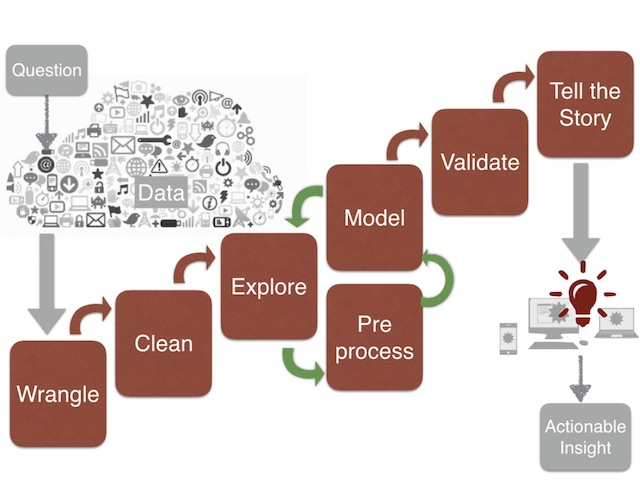

<div class="alert alert-block alert-info"><b></b></div>

# Imports:

In [1]:
import wrangle
import explore

<div class="alert alert-block alert-info"><b></b></div>

# Acquire:

<div class="alert alert-block alert-info"><b></b></div>

### Web-Scraping GitHub with Beautiful Soup
***

***1. Identify HTML target feature using Beautiful Soup***

`Repo README.md text` - soup.select('article', class_="markdown-body entry-content container-lg")[0].text

`Repo primary language` - soup.select('li.d-inline:nth-child(1) > a:nth-child(1)')[0].text

***2. Code extraction functions used to create corpus***

`def get_soup()`
This function takes in a URL, parses the HTML and returns a BeautifulSoup object

`def gethub_geology_urls()`
This function returns a list of URLs that can be read in the get_readme_articles() function

`def get_geo_results()`
This function scrapes and returns a list of repo URLs from search results

### Explanation:

Using the python library, Beautiful Soup, the README.md text of 507 GitHub repositories were scraped. I focused my search exclusively on repositories identifed by the keyword'Geology'. The results of this scrape were saved in a json file and were used as our research corpus.

<div class="alert alert-block alert-info"><b></b></div>

# Prepare:

<div class="alert alert-block alert-info"><b></b></div>

In [2]:
# def prep_data(df, column):
#     df['content_clean'] = df[column].apply(basic_clean)\
#                                     .apply(tokenize)\
#                                     .apply(lemmatize)\
#                                     .apply(remove_stopwords)\
#                                     .apply(remove_extra_words)

#     # add a column with a list of words
#     words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.content_clean]

#     # column name will be words, and the column will contain lists of the words in each doc
#     df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)

#     # add column with number of words in readme content
#     df['doc_length'] = [len(wordlist) for wordlist in df.words]
    
#     # Adds column with bigrams and trigrams
#     df['bigrams'] =  df['text_filtered'].apply(lambda row: list(nltk.bigrams(row.split(' '))))
#     df['trigrams'] =  df['text_filtered'].apply(lambda row: list(nltk.trigrams(row.split(' '))))
    
#     # Specify dataframe content
#     df = df[['language','content','content_clean','doc_length','words','bigrams','trigrams']]
#     return df


### Explanation:

`basic_clean( ):` This function changes the text to lowercase, removes special characters, encodes to ascii and recode to utf-8 to remove numbers from the text, and finally replaces anything that is not a letter, number, whitespace, or a single quote with an empty string. 

`tokenize( ):` This function takes in a string and returns that string broken up in to a list of individual words.

`lemmatize( ):` This function takes in string for and returns a string with words simplified to dictionary roots.

`remove_stopwords():` This function is a spealized cleaning tool from the Gensim library that cleans and parses 
                      text for topic modeling and removes more common words then the traditional nltk library.

***
### Natural Language ToolKit (NLTK)

-NLTK library has 179 words in the stopword collection.

Note: All the words in the default library’s stopword list are in lower case, that means documents/sentences words also must be lower case. Otherwise, stopword not got removed from your data.

In [3]:
from nltk.corpus import stopwords
nltk_stopwords = set(stopwords.words('english'))
text = f"The first time I saw Catherine she was wearing a vivid crimson dress and was nervously " \
f"leafing through a magazine in my waiting room."
text_without_stopword = [word for word in text.split() if word.lower() not in nltk_stopwords]
print(f"Original Text : {text}")
print(f"Text without stopwords : {' '.join(text_without_stopword)}")
print(f"Total count of stopwords in NLTK is {len(nltk_stopwords)}")

Original Text : The first time I saw Catherine she was wearing a vivid crimson dress and was nervously leafing through a magazine in my waiting room.
Text without stopwords : first time saw Catherine wearing vivid crimson dress nervously leafing magazine waiting room.
Total count of stopwords in NLTK is 179


***
### Gensim Library

-Gensim has 337 words in their stopwords collection

Note: 

In [4]:
from gensim.parsing.preprocessing import remove_stopwords
import gensim

gensim_stopwords = gensim.parsing.preprocessing.STOPWORDS

text = f"The first time I saw Catherine she was wearing a vivid crimson dress and was nervously " \
       f"leafing through a magazine in my waiting room."

print(f"Original Text : {text}")
print(f"Text without stopwords : {remove_stopwords(text.lower())}")
print(f"Total count of stopwords in Ginsim is {len(gensim_stopwords)}")

Original Text : The first time I saw Catherine she was wearing a vivid crimson dress and was nervously leafing through a magazine in my waiting room.
Text without stopwords : time saw catherine wearing vivid crimson dress nervously leafing magazine waiting room.
Total count of stopwords in Ginsim is 337


<div class="alert alert-block alert-info"><b></b></div>

# Data Exploration: (Topic Modeling)

1. Create list of words using feature extraction
2. Apply LDA
3. Use LDA to predict (n) Topics
4. Explore topics for correlations
5. Repeat and fine tune model parameters

<div class="alert alert-block alert-info"><b></b></div>

### Call in Clean Data Frame

In [5]:
df = wrangle.get_geo_results(cached=True)
df = wrangle.prep_data(df, 'content')
df.head()

,language,content,content_clean,doc_length,words,bigrams,trigrams
0,Python,Map Merger tool - tested using ArcMap 10.7\nWr...,map merger tool tested arcmap written ryan cro...,38,"[map, merger, tool, tested, arcmap, written, r...","[(map, merger), (merger, tool), (tool, tested)...","[(map, merger, tool), (merger, tool, tested), ..."
1,Jupyter Notebook,wellio.js\nJavaScript for converting well-log ...,welliojs javascript converting welllog standar...,1053,"[welliojs, javascript, converting, welllog, st...","[(welliojs, javascript), (javascript, converti...","[(welliojs, javascript, converting), (javascri..."
2,Python,geomodel-2-3dweb\n\nGenerates 3D web versions ...,geomodeldweb generates d web version geologica...,152,"[geomodeldweb, generatesweb, version, geologic...","[(geomodeldweb, generates), (generates, d), (d...","[(geomodeldweb, generates, d), (generates, d, ..."
3,JavaScript,GeoFeature\nGeological features of the Quanfoc...,geofeature geological feature quanfock hill de...,166,"[geofeature, geological, feature, quanfock, hi...","[(geofeature, geological), (geological, featur...","[(geofeature, geological, feature), (geologica..."
4,JavaScript,U.S. Geological Survey Best Practices\nThis re...,u geological survey best practice repository h...,13,"[u, geological, survey, best, practice, reposi...","[(u, geological), (geological, survey), (surve...","[(u, geological, survey), (geological, survey,..."


***
### Topic Modeling: Step One (Creating a list of Words using Feature Extraction)

- Before we can apply LDA, we need to create vocabulary of all the words in our data. We do so with the help of a count vectorizer.   


- sklearn.feature_extraction.text module to create a document-term matrix. We specify to only include those words that appear in less than 80% of the document and appear in at least 2 documents. We also remove all the stop words as they do not really contribute to topic modeling.   

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(df['content_clean'].values.astype('U'))
doc_term_matrix

<507x5159 sparse matrix of type '<class 'numpy.int64'>'
	with 39279 stored elements in Compressed Sparse Row format>

`Each of 507 documents is represented as 5159 dimensional vector, which means that our `corpus has 5159 words.`

***
### Topic Modeling: Step Two (Applying LDA)

- We next use LatentDirichletAllocation class from the sklearn.decomposition library to perform LDA on our document-term matrix. The parameter n_components specifies the number of categories, or topics, that we want our text to be divided into. The parameter random_state (aka the seed) is set to 123 so that you get similar results each time.


- Let's verify it word by randomly fetching words from our vocabulary. We can use the get_feature_names() method and pass it the ID of the word that we want to fetch.

In [7]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [8]:
# 10 random words
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

httpsgithubcomusgsgemstoolspro
cal
institute
loader
dissertation
reef
superpuestos
combination
handled
engineer


***
### Topic Modeling: Step Three (Review Groups and Append to Data Frame)

- Using the components_ attribute from LDA we use the argsort() function to sort the (n) number of words with the hightest probaiity of being associated with each of the five topics.  If these groups make sense, we can append them to to the dataframe. 


In [9]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['source', 'book', 'software', 'repository', 'license', 'project', 'report', 'data', 'enabled', 'file']


Top 10 words for topic #1:
['start', 'project', 'code', 'use', 'app', 'npm', 'build', 'test', 'run', 'file']


Top 10 words for topic #2:
['mesh', 'project', 'file', 'run', 'data', 'task', 'example', 'geomodeller', 'model', 'geology']


Top 10 words for topic #3:
['use', 'text', 'field', 'geologic', 'feature', 'geological', 'model', 'file', 'map', 'data']


Top 10 words for topic #4:
['pip', 'information', 'file', 'usgs', 'map', 'set', 'python', 'install', 'earthquake', 'data']




- As a final step, we will add a column to the original data frame that will store the topic for the text. To do so, we can use LDA.transform() method and pass it our document-term matrix. This method will assign the probability of all the topics to each document.

In [10]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(507, 5)

- The output (507, 5) lets us know that each of the document have been sorted in to 5 groups where each group corresponds to the probability value of a particular topic. Finally we will add a new column for topic in the data frame and assigns the topic value to each row in the column.


In [11]:
df['topic'] = topic_values.argmax(axis=1)
df.head()

,language,content,content_clean,doc_length,words,bigrams,trigrams,topic
0,Python,Map Merger tool - tested using ArcMap 10.7\nWr...,map merger tool tested arcmap written ryan cro...,38,"[map, merger, tool, tested, arcmap, written, r...","[(map, merger), (merger, tool), (tool, tested)...","[(map, merger, tool), (merger, tool, tested), ...",0
1,Jupyter Notebook,wellio.js\nJavaScript for converting well-log ...,welliojs javascript converting welllog standar...,1053,"[welliojs, javascript, converting, welllog, st...","[(welliojs, javascript), (javascript, converti...","[(welliojs, javascript, converting), (javascri...",3
2,Python,geomodel-2-3dweb\n\nGenerates 3D web versions ...,geomodeldweb generates d web version geologica...,152,"[geomodeldweb, generatesweb, version, geologic...","[(geomodeldweb, generates), (generates, d), (d...","[(geomodeldweb, generates, d), (generates, d, ...",4
3,JavaScript,GeoFeature\nGeological features of the Quanfoc...,geofeature geological feature quanfock hill de...,166,"[geofeature, geological, feature, quanfock, hi...","[(geofeature, geological), (geological, featur...","[(geofeature, geological, feature), (geologica...",0
4,JavaScript,U.S. Geological Survey Best Practices\nThis re...,u geological survey best practice repository h...,13,"[u, geological, survey, best, practice, reposi...","[(u, geological), (geological, survey), (surve...","[(u, geological, survey), (geological, survey,...",0


***
## Topic Modeling: Step Four (Explore topics for correlations)

- Wordcount List

- Poroprtion Visuliazation

- Wordclouds

### Call in df

In [12]:

df1 = wrangle.get_geo_results(cached=True)
df1 = wrangle.prep_data(df1, 'content')
df1 = explore.nlp_topic_modeling(df1, max_df = 0.8 , min_df = 2 , n_components = 5)
df1.head()

Top 5 words for topic #0:
['geological', 'usgs', 'text', 'report', 'set', 'project', 'earthquake', 'file', 'map', 'data']


Top 5 words for topic #1:
['example', 'code', 'geological', 'geology', 'version', 'python', 'run', 'model', 'data', 'file']


Top 5 words for topic #2:
['line', 'package', 'notebook', 'powerlaw', 'exercise', 'deposit', 'pip', 'conda', 'python', 'install']


Top 5 words for topic #3:
['code', 'app', 'project', 'npm', 'test', 'build', 'use', 'run', 'file', 'enabled']


Top 5 words for topic #4:
['earthquake', 'usgs', 'file', 'build', 'use', 'geological', 'project', 'app', 'android', 'license']




,language,content,content_clean,doc_length,words,bigrams,trigrams,topic
0,Python,Map Merger tool - tested using ArcMap 10.7\nWr...,map merger tool tested arcmap written ryan cro...,38,"[map, merger, tool, tested, arcmap, written, r...","[(map, merger), (merger, tool), (tool, tested)...","[(map, merger, tool), (merger, tool, tested), ...",4
1,Jupyter Notebook,wellio.js\nJavaScript for converting well-log ...,welliojs javascript converting welllog standar...,1053,"[welliojs, javascript, converting, welllog, st...","[(welliojs, javascript), (javascript, converti...","[(welliojs, javascript, converting), (javascri...",0
2,Python,geomodel-2-3dweb\n\nGenerates 3D web versions ...,geomodeldweb generates d web version geologica...,152,"[geomodeldweb, generatesweb, version, geologic...","[(geomodeldweb, generates), (generates, d), (d...","[(geomodeldweb, generates, d), (generates, d, ...",4
3,JavaScript,GeoFeature\nGeological features of the Quanfoc...,geofeature geological feature quanfock hill de...,166,"[geofeature, geological, feature, quanfock, hi...","[(geofeature, geological), (geological, featur...","[(geofeature, geological, feature), (geologica...",2
4,JavaScript,U.S. Geological Survey Best Practices\nThis re...,u geological survey best practice repository h...,13,"[u, geological, survey, best, practice, reposi...","[(u, geological), (geological, survey), (surve...","[(u, geological, survey), (geological, survey,...",0


In [13]:
# combine list of word counts into df for further exploration

# create a list of words for each language category and remove single letter words
t0_words,t1_words,t2_words,t3_words,t4_words = explore.create_lang_word_list(df1)

# get the count of words by category
t0_freq, t1_freq, t2_freq, t3_freq, t4_freq = explore.get_count_word_freq(t0_words,t1_words,t2_words,t3_words,t4_words)

# combine list of word counts into df for further exploration
word_counts1 = explore.create_df_word_counts(t0_freq, t1_freq, t2_freq, t3_freq, t4_freq)
word_counts1 = explore.word_counts_proportion(word_counts1)
word_counts1

,t0,t1,t2,t3,t4,all_words,prop_t0,prop_t1,prop_t2,prop_t3,prop_t4
&#9;,149,7,65,1,12,234,0.636752,0.029915,0.277778,0.004274,0.051282
&#9;dtm,0,0,4,0,0,4,0.000000,0.000000,1.000000,0.000000,0.000000
&#9;dtm&#9;,0,0,2,0,0,2,0.000000,0.000000,1.000000,0.000000,0.000000
&#9;expressed,1,0,0,0,0,1,1.000000,0.000000,0.000000,0.000000,0.000000
&#9;geological,1,0,0,0,0,1,1.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
zurich,1,0,0,0,0,1,1.000000,0.000000,0.000000,0.000000,0.000000
zusammenfassung,0,0,0,0,1,1,0.000000,0.000000,0.000000,0.000000,1.000000
zwischen,0,0,0,0,2,2,0.000000,0.000000,0.000000,0.000000,1.000000
zwrocic,0,0,1,0,0,1,0.000000,0.000000,1.000000,0.000000,0.000000


<Figure size 864x576 with 0 Axes>

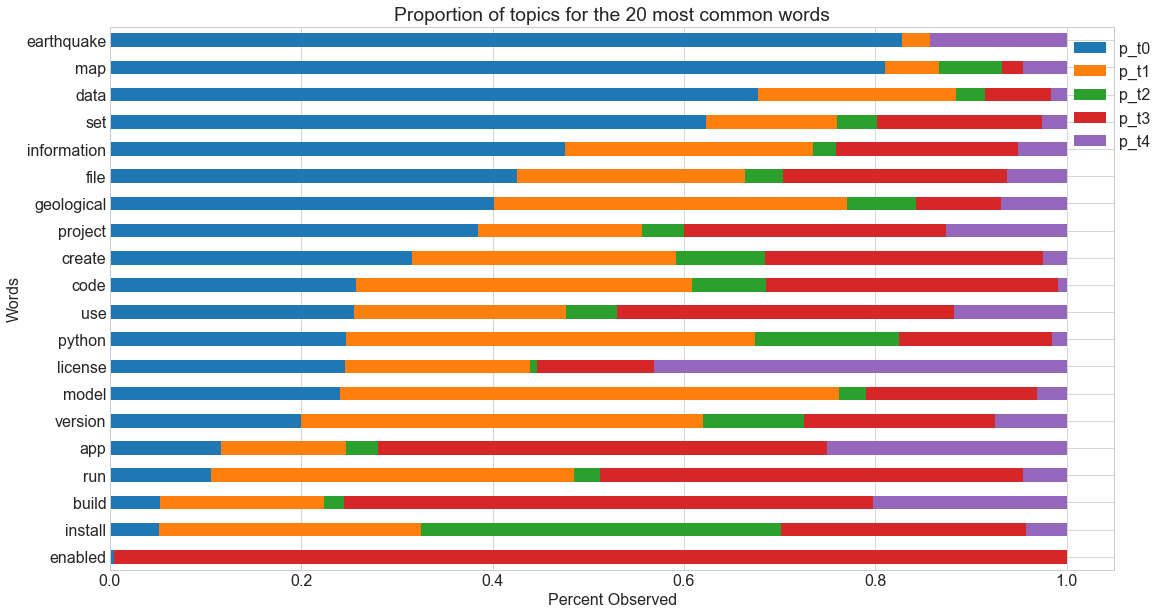

In [22]:
explore.proportion_visualization(word_counts1)

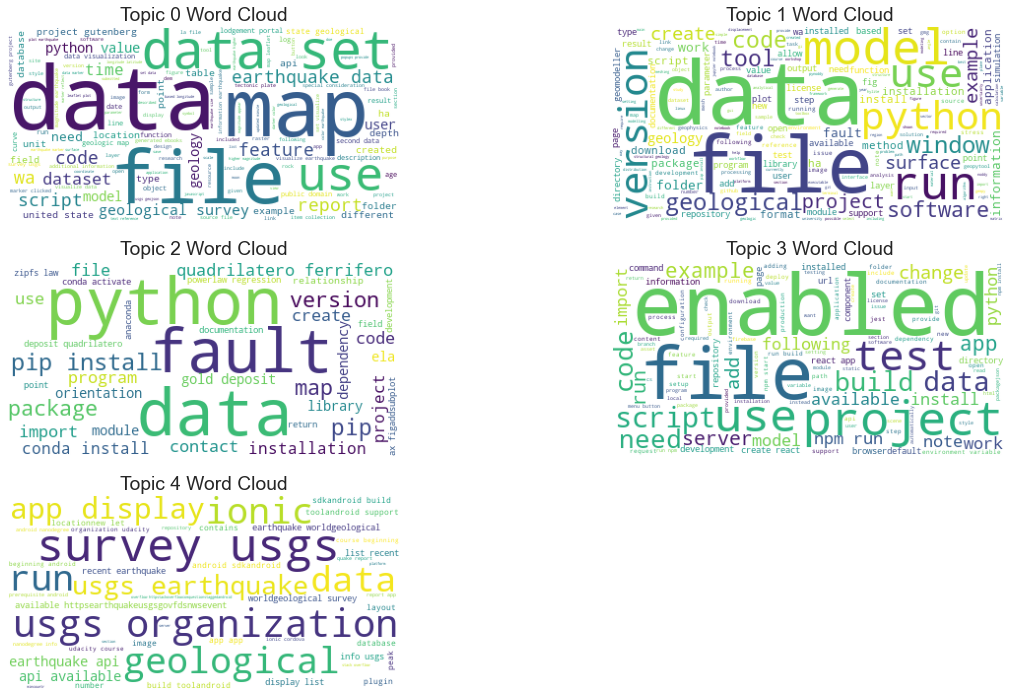

In [15]:
explore.plot_wordcloud(df1)

<div class="alert alert-block alert-info"><b></b></div>

### Takeaway:

`Some peliminary differences are visible, however common words block clear trends`

- To clean up corpus must remove common words (non-Geology)
- Remove repository in Spannish (TypeScript)

<div class="alert alert-block alert-info"><b></b></div>

### Topic Modeling: Step Five (Fine Tune Model Parameters)

- Remove additional non content specific common words **(~800)**

- Run through the modeling process a second time to fine tune results 

In [16]:
df2 = wrangle.get_geo_results(cached=True)
df2 = wrangle.prep_data_extra_words(df2, 'content')
df2.head()

,language,content,content_clean,doc_length,words,bigrams,trigrams
0,Python,Map Merger tool - tested using ArcMap 10.7\nWr...,merger tested arcmap written ryan crow usgs ai...,22,"[merger, tested, arcmap, written, ryan, crow, ...","[(merger, tested), (tested, arcmap), (arcmap, ...","[(merger, tested, arcmap), (tested, arcmap, wr..."
1,Jupyter Notebook,wellio.js\nJavaScript for converting well-log ...,welliojs converting welllog standard isn ' t p...,526,"[welliojs, converting, welllog, standard, isnt...","[(welliojs, converting), (converting, welllog)...","[(welliojs, converting, welllog), (converting,..."
2,Python,geomodel-2-3dweb\n\nGenerates 3D web versions ...,geomodeldweb generates d primarily geomodelpor...,89,"[geomodeldweb, generatesprimarily, geomodelpor...","[(geomodeldweb, generates), (generates, d), (d...","[(geomodeldweb, generates, d), (generates, d, ..."
3,JavaScript,GeoFeature\nGeological features of the Quanfoc...,geofeature quanfock hill demo httpsgeoffrowlan...,98,"[geofeature, quanfock, hill, demo, httpsgeoffr...","[(geofeature, quanfock), (quanfock, hill), (hi...","[(geofeature, quanfock, hill), (quanfock, hill..."
4,JavaScript,U.S. Geological Survey Best Practices\nThis re...,u best practice largely superseded usgs manage...,7,"[u, best, practice, largely, superseded, usgs,...","[(u, best), (best, practice), (practice, large...","[(u, best, practice), (best, practice, largely..."


### Apply Topic Modeling to New Corpus

In [17]:
df2 = explore.nlp_topic_modeling(df2, max_df = 0.8 , min_df = 2 , n_components = 5)
df2.head()

Top 5 words for topic #0:
['day', 'united', 'menu', 'depth', 'layer', 'log', 'state', 'magnitude', 'usgs', 'earthquake']


Top 5 words for topic #1:
['rank', 'analytical', 'stress', 'geomodeller', 'element', 'seismic', 'powerlaw', 'surface', 'fault', 'deposit']


Top 5 words for topic #2:
['symbol', 'consideration', 'date', 'layer', 'special', 'water', 'myenvname', 'ela', 'age', 'field']


Top 5 words for topic #3:
['borehole', 'profile', 'archive', 'digital', 'item', 'ontology', 'collection', 'ebooks', 'gitenberg', 'gutenberg']


Top 5 words for topic #4:
['iv', 'distributed', 'adding', 'deploy', 'edit', 'projection', 'cs', 'usgs', 'ionic', 'formation']




,language,content,content_clean,doc_length,words,bigrams,trigrams,topic
0,Python,Map Merger tool - tested using ArcMap 10.7\nWr...,merger tested arcmap written ryan crow usgs ai...,22,"[merger, tested, arcmap, written, ryan, crow, ...","[(merger, tested), (tested, arcmap), (arcmap, ...","[(merger, tested, arcmap), (tested, arcmap, wr...",0
1,Jupyter Notebook,wellio.js\nJavaScript for converting well-log ...,welliojs converting welllog standard isn ' t p...,526,"[welliojs, converting, welllog, standard, isnt...","[(welliojs, converting), (converting, welllog)...","[(welliojs, converting, welllog), (converting,...",0
2,Python,geomodel-2-3dweb\n\nGenerates 3D web versions ...,geomodeldweb generates d primarily geomodelpor...,89,"[geomodeldweb, generatesprimarily, geomodelpor...","[(geomodeldweb, generates), (generates, d), (d...","[(geomodeldweb, generates, d), (generates, d, ...",2
3,JavaScript,GeoFeature\nGeological features of the Quanfoc...,geofeature quanfock hill demo httpsgeoffrowlan...,98,"[geofeature, quanfock, hill, demo, httpsgeoffr...","[(geofeature, quanfock), (quanfock, hill), (hi...","[(geofeature, quanfock, hill), (quanfock, hill...",2
4,JavaScript,U.S. Geological Survey Best Practices\nThis re...,u best practice largely superseded usgs manage...,7,"[u, best, practice, largely, superseded, usgs,...","[(u, best), (best, practice), (practice, large...","[(u, best, practice), (best, practice, largely...",3


### Explore Topics 

In [18]:
# combine list of word counts into df for further exploration

# create a list of words for each language category and remove single letter words
t0_words,t1_words,t2_words,t3_words,t4_words = explore.create_lang_word_list(df2)

# get the count of words by category
t0_freq, t1_freq, t2_freq, t3_freq, t4_freq = explore.get_count_word_freq(t0_words,t1_words,t2_words,t3_words,t4_words)

# combine list of word counts into df for further exploration
word_counts2 = explore.create_df_word_counts(t0_freq, t1_freq, t2_freq, t3_freq, t4_freq)
word_counts2 = explore.word_counts_proportion(word_counts2)
word_counts2

,t0,t1,t2,t3,t4,all_words,prop_t0,prop_t1,prop_t2,prop_t3,prop_t4
aapgexamples,1,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
aardvark,0,0,0,2,0,2,0.0,0.0,0.0,1.0,0.0
aba,0,1,0,0,0,1,0.0,1.0,0.0,0.0,0.0
abandoned,1,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
abandonment,0,0,2,0,0,2,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
zurich,0,0,0,1,0,1,0.0,0.0,0.0,1.0,0.0
zusammenfassung,0,0,0,1,0,1,0.0,0.0,0.0,1.0,0.0
zwischen,0,0,0,2,0,2,0.0,0.0,0.0,1.0,0.0
zwrocic,0,0,0,1,0,1,0.0,0.0,0.0,1.0,0.0


<Figure size 864x576 with 0 Axes>

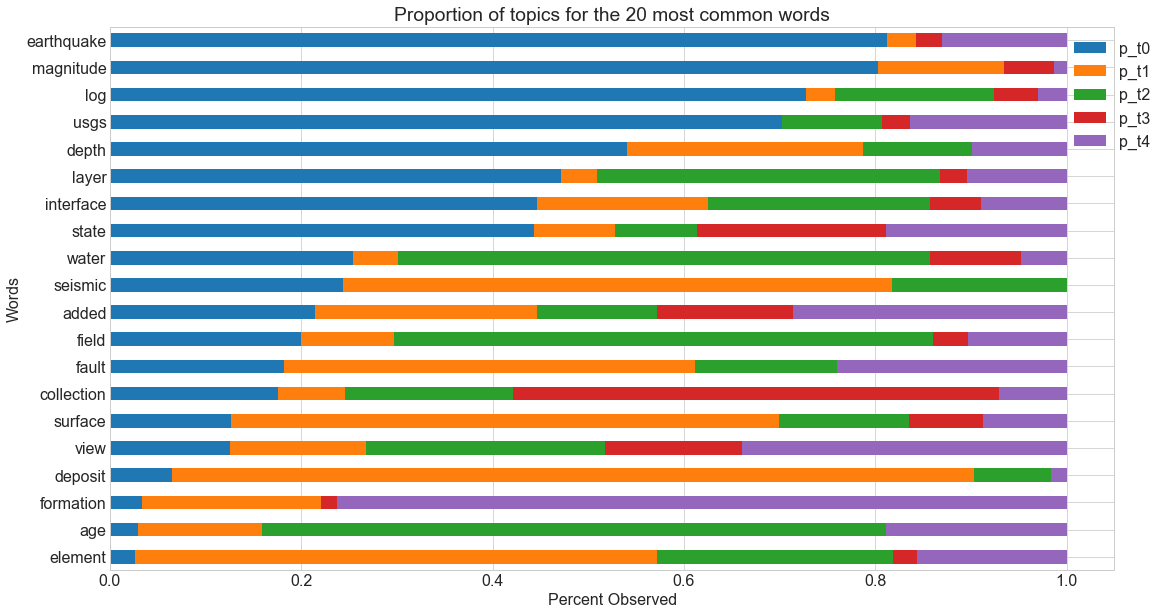

In [19]:
# visualize the % of the term in each language
explore.proportion_visualization(word_counts2)

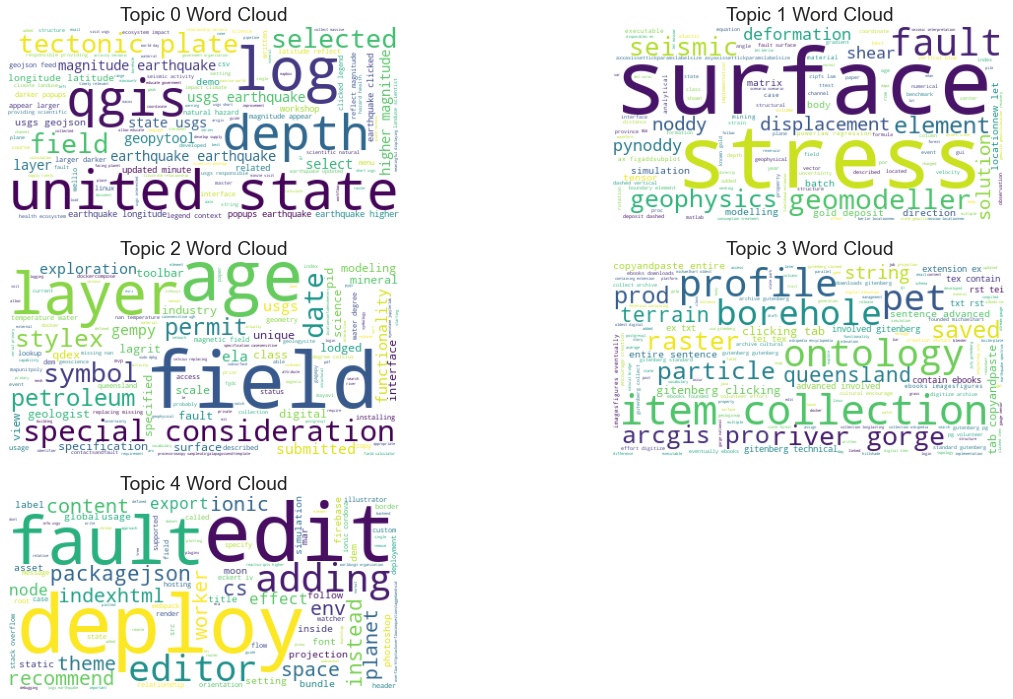

In [20]:
explore.plot_wordcloud(df2)

<div class="alert alert-block alert-info"><b></b></div>

### Takeaway:

- Clear trends visible
- 5 Topics can be generally described as follows:

Topic 0: Seismology   
Topic 1: Structural Geology   
Topic 2: Minning   
Topic 3: Geomorphology   
Topic 4: Geochemistry    

<div class="alert alert-block alert-info"><b></b></div>

# Results:

<div class="alert alert-block alert-info"><b></b></div>

***Topic modeling Round 1: Corpus with only stopwords removed***
- In the first round of modeling topics were hard to observe due to the large volume of common words that were shared between the documents.  One spannish language library (TypeScript) was removed from corpus along with ~800 common words.  These words were identfied using domain knowldge and included common words and words associated with out of field technological tems (git, website, module, etc.)

***Topic modeling Round 2: Corpus with extra stopwords removed***
- The second round of model was more successful then the previous, and was terminated when the list of the 20 most common words were content related, and individual word frequencies were topic specific.  This second round of modeling produced five topics that could be generally described as follows:

Topic 0: Seismology   
Topic 1: Structural Geology  
Topic 2: Minning   
Topic 3: Geomorphology   
Topic 4: Geochemistry  


<div class="alert alert-block alert-info"><b></b></div>

# Reflection Questions:

<div class="alert alert-block alert-info"><b></b></div>


### How did the project go? Did you meet your goal? Why or why not?

- This project ended differently then I thought it would. My goal was to see if it was possible to use NLP to infer topics from a body of text, however I did not know that this was actually a sub-field of NLP known as topic modeling.  After speaking to Ryan and doing a lot of research I was able to use a topic modeling library (LDA) to assist me with my goal.  If i had known from the offset that this project was going to use a specific machine learning library to map text in to topics I would have picked a cleaner data source (blog posts/research journals).  I was really bogged down in cleaning my corpus (removed 800 common words by hand) but I learned a lot about topic modeling in the process.  

### What are your next steps?

- The next steps are to scrape more README's and incorporate the title of the repository as a second corpus.  I want to be able to preform LDA on the main body of text and the titles to see to test how well I did at cleaning the data and implementing the machine learning library.  

### For each stage of the pipeline, where could you make improvements?

***Planning***
- In planning I knew I wanted to keep working on an NPL project that I had started, so I took a corpus that I had already collected and decided to see if I could explore it using NLP and use keywords to identify trends or topics in the data.  

***Acquire***
- In acquire my function had an error which resulted in ony the first result page being scrapped 500 times.  This setback really cost me a lot of time, but when I was able to make the fix I was able to finally return a large enough corpus to preform my study.

***Prepare***
- In prepare I struggled to get my function to correctly remove stopwords.  Finally I installed the Gensim library to handel all of my stopwords (you can apply gensim to a body of text and not think about it) and had a create a function that looped through my list 0f 800 custom stop words that was used in the second round of modeling.

***Explore***
- In explore I needed a function that would provide me with common words for my corpus so they could be removed.  Most of my time in explore was spent identifying common words that needed to be removed before topic modeling would be effective.

***Model***
- Topic modeling and exploration were combined on this project.  The first round of topic modeling produced muddy results and needed lots of time in eplore identifying and removing common words before the second round of modeling providing generally identfiable topics.  

***Delivery***
- Delivery is the part of the pipeline that I am most comforable with.  I want to make sure that I have lots of time to prepare for delivery and lots of time to read up on Topic Modeling.  Since it is an NLP technique that we did not learn in class I want to make sure that I can explain how it works and why I chose to work with it before I present my findings.  

<div class="alert alert-block alert-info"><b></b></div>

# Next Steps:

<div class="alert alert-block alert-info"><b></b></div>

***Validate Topics:***

- Go back and collect the title from the repository as well as the README text.  Preform topic modeling on both and look for correlations

***Expand Corpus:***

- Using the topics identified scan more repositores and look to correlate results